In [84]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import pandas as pd
from nltk.corpus import stopwords
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
import nltk


data = pd.read_csv("C:/Users/heave/Project/question1_sentiment.csv" , dtype={'review':str})
#print(data.info())
#DataFrame(data.head())
#data.head()
#print(data.describe())
#print(data)

#data["review"].head()

#data = data.rename(columns = {'id':'a' , 'label':'b' , 'review':'c'}) #列名重命名



In [85]:

#data["review"].head()
#data.to_csv('cleanfile.csv' encoding='utf-8') #数据保存

data.review = data.review.str.lower()
data.review = data.review.str.strip()
#data.dropna() #删除包含NA的不完整的行
#data.dropna(subset=['review'])
#data.review.head()

In [88]:
from bs4 import BeautifulSoup

def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'lxml').get_text() 
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 4. Create set of stopwords
    #stops = set(stopwords.words("english"))                  
    
    # 5. Remove stop words
    #meaningful_words = [w for w in words if not w in stops]   
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( words ))   

data['review']=data['review'].apply(review_to_words)
#df_test["review"]=df_test["review"].apply(review_to_words)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id        25000 non-null int64
label     25000 non-null int64
review    25000 non-null object
dtypes: int64(2), object(1)
memory usage: 586.0+ KB


In [89]:
data.dropna() #删除包含NA的不完整的行


,id,label,review
0,1,1,with all this stuff going down at the moment w...
1,2,1,the classic war of the worlds by timothy hines...
2,3,0,the film starts with a manager nicholas bell g...
3,4,0,it must be assumed that those who praised this...
4,5,1,superbly trashy and wondrously unpretentious s...
5,6,1,i dont know why people think this is such a ba...
6,7,0,this movie could have been very good but comes...
7,8,0,i watched this video at a friend s house i m g...
8,9,0,a friend of mine bought this film for and even...
9,10,1,this movie is full of references like mad max ...


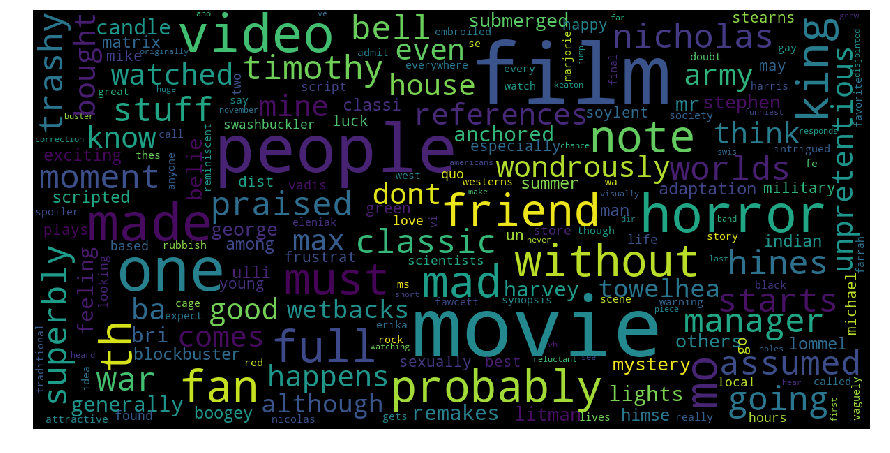

In [91]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data["review"])

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

list_classes = ["sentiment"]
#y = new_train[list_classes].values
y = data[list_classes].values
list_sentences_train = data["review"]
#list_sentences_test = df_test["review"]
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
#list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)